# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train_orig = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train, y_train = X_train_orig, y_train_orig

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_occurrences_counts(column, dataset, title=None):
    labels_df = pd.DataFrame({ column: dataset })
    labels_df[column].value_counts().plot(kind='bar',figsize=(15,10), title=title)

Plot an example of training data

4


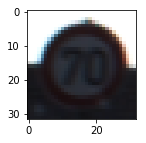

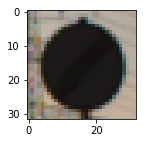

In [5]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

liamges = X_train_orig[y_train_orig==32]
lindex = random.randint(0, len(liamges))
image_l = liamges[lindex]

def plot_image(image, cmap=None):
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap=cmap)


plot_image(image)
plot_image(image_l)

print(y_train[index])

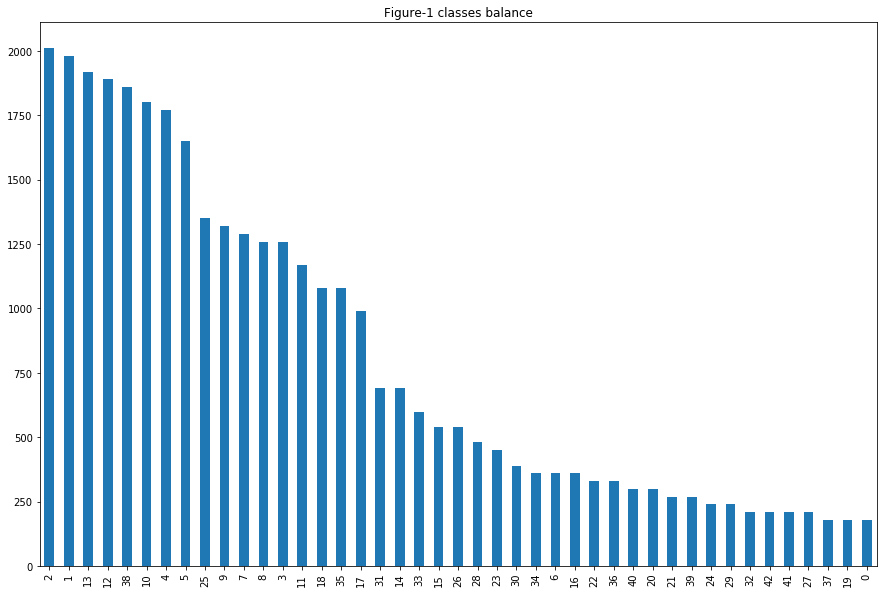

In [6]:
# I'll plot the labels of training set, to see whether yes or not all classes are balanced.
plot_occurrences_counts('labels', y_train, title='Figure-1 classes balance')

The image above shows that training labels of sings are not equal balances. I should work on it try to balance they as much as possible in order to train the model and get a good performance. I'll train with both datasets unbalanced and balanced to see what's the difference in this regard.

Probably this section will be after build the first model to see if gets better after this change, same as unbalanced data modifications.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

----
###  BaseLine Model (Basic LeNet)

I wanted to create this step to make the minor modifications to the LetNet and feed with the train data without any modifications such that I can take this training and evaluation of it as baseline model.


In [7]:
### The code above it is for the baseline model

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCHS = 10
BATCH_SIZE = 128

X_train, y_train = shuffle(X_train, y_train)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Baseline Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("*Baseline - EPOCH {} ...".format(i+1))
        print("*Baseline - Validation Accuracy = {:.3f}".format(validation_accuracy))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Baseline Test Accuracy = {:.3f}".format(test_accuracy))

Baseline Training...
*Baseline - EPOCH 1 ...
*Baseline - Validation Accuracy = 0.539
*Baseline - EPOCH 2 ...
*Baseline - Validation Accuracy = 0.699
*Baseline - EPOCH 3 ...
*Baseline - Validation Accuracy = 0.775
*Baseline - EPOCH 4 ...
*Baseline - Validation Accuracy = 0.810
*Baseline - EPOCH 5 ...
*Baseline - Validation Accuracy = 0.839
*Baseline - EPOCH 6 ...
*Baseline - Validation Accuracy = 0.834
*Baseline - EPOCH 7 ...
*Baseline - Validation Accuracy = 0.849
*Baseline - EPOCH 8 ...
*Baseline - Validation Accuracy = 0.863
*Baseline - EPOCH 9 ...
*Baseline - Validation Accuracy = 0.854
*Baseline - EPOCH 10 ...
*Baseline - Validation Accuracy = 0.863
Baseline Test Accuracy = 0.835


----

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def scale_data(data):
    return (data - 128.0)/128.0 


As shown in Figure-1 data classes are skewed, I'll augment data to mitigate this problem.
 * Class 2 has 2010 examples which are the max number of examples
 * Class 0 has 180 examples which are the class with less number of examples
 * I would like to have 2100 number of example for every class. to achieve that I'll follow these steps
     1. Per class randomly select an image from that class
     2. Apply randomly one of these transformation (clipped_zoom, bright_trasform, rotate_) with random parameters
     3. Append the new augmented image to a list
     4. repeat steps 1 to 3 until number of elements of the list plus number of example of current class sums 2100
     5. append the augmented list to the current training data



* The function for make zoom on the images was used from [stackoverflow post](http://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions?answertab=active#tab-top )

* The function for add bright to an image was based on this blog-post [Vivek Yadav](https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc)


<function bright_trasform at 0x156087510> 1.62


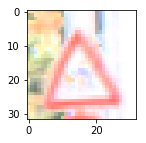

In [10]:
#data augmentation
from scipy import ndimage
from scipy.ndimage import zoom
import cv2

from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def bright_trasform(image, bright):
    image = cv2.cvtColor(image.copy(),cv2.COLOR_RGB2HSV)
    image_f = np.array(image, dtype = np.float64)

    image_f[:, :, 2] = image_f[:, :, 2] * (bright + np.random.uniform())
    image_f[:, :, 2][image_f[:, :, 2] > 255]  = 255
    image_f = np.array(image_f, dtype = np.uint8)
    image_f = cv2.cvtColor(image_f,cv2.COLOR_HSV2RGB)
    return image_f

def rotate_(image, deg):
    return ndimage.rotate(image, deg, reshape=False)

augmentations = {
    0: {"fn": clipped_zoom, "values": np.arange(0.5,1.7,0.08) },
    1: {"fn": bright_trasform, "values": np.arange(0.1,9,0.08) },
    2: {"fn": rotate_, "values": np.arange(-20,20,0.5)}
}

def augment_image(img, augmentations=augmentations, verbose=False):
    fn_index = random.randint(0, len(augmentations)-1)
    values_t = augmentations[fn_index]["values"]
    fn_t =  augmentations[fn_index]["fn"]
    val_index = random.randint(0, len(values_t)-1)
    fn_value = values_t[val_index]
    if verbose:
        print(fn_t, values_t[val_index])
    return fn_t(img, fn_value)

plot_image(augment_image(X_train_orig[random.randint(0, len(X_train_orig)-1)], verbose=True) )


In [11]:
for klass in range(43):
    class_data = X_train_orig[y_train_orig == klass]
    class_m = class_data.shape[0]
    num_needed_examples = 2100 - class_m
    
    augmented = []
    y_augmented = []
    for _ in range(num_needed_examples):
        index = random.randint(0, class_m-1)
        img = augment_image(class_data[index]) 
        augmented.append(img)
        y_augmented.append(klass)

    print("{} new images for class {}".format(num_needed_examples, klass))
    X_train = np.append(X_train, augmented, axis=0)
    y_train = np.append(y_train, y_augmented, axis=0)

/Users/ram/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


1920 new images for class 0
120 new images for class 1
90 new images for class 2
840 new images for class 3
330 new images for class 4
450 new images for class 5
1740 new images for class 6
810 new images for class 7
840 new images for class 8
780 new images for class 9
300 new images for class 10
930 new images for class 11
210 new images for class 12
180 new images for class 13
1410 new images for class 14
1560 new images for class 15
1740 new images for class 16
1110 new images for class 17
1020 new images for class 18
1920 new images for class 19
1800 new images for class 20
1830 new images for class 21
1770 new images for class 22
1650 new images for class 23
1860 new images for class 24
750 new images for class 25
1560 new images for class 26
1890 new images for class 27
1620 new images for class 28
1860 new images for class 29
1710 new images for class 30
1410 new images for class 31
1890 new images for class 32
1501 new images for class 33
1740 new images for class 34
1020 new 

In [12]:
X_train = scale_data(X_train) 
X_validation = scale_data(X_validation) 
X_test = scale_data(X_test) 
X_validation

array([[[[-0.8984375, -0.90625  , -0.90625  ],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.8984375, -0.9140625, -0.9140625],
         ..., 
         [-0.890625 , -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        [[-0.8984375, -0.90625  , -0.8984375],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.8984375, -0.90625  , -0.90625  ],
         ..., 
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        [[-0.8984375, -0.90625  , -0.8984375],
         [-0.90625  , -0.9140625, -0.90625  ],
         [-0.90625  , -0.90625  , -0.90625  ],
         ..., 
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.8984375, -0.90625  , -0.9140625],
         [-0.90625  , -0.90625  , -0.9140625]],

        ..., 
        [[-0.875    , -0.8828125, -0.8828125],
         [-0.8828125, -0.890625 , -0.89062

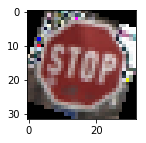

In [13]:
idx = random.randint(0, len(X_train)-1)
ima = X_train[idx]
plot_image(ima)

### Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## make sure to reset these values 
EPOCHS = None
BATCH_SIZE = None
rate = None

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)


# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x20.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 20), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(20))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)

# SOLUTION: Pooling. Input = 28x28x20. Output = 14x14x20.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x50.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 20, 50), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(50))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# SOLUTION: Activation.
conv2 = tf.nn.relu(conv2)

# SOLUTION: Pooling. Input = 10x10x50. Output = 5x5x50.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Flatten. Input = 5x5x50. Output = 1250.
fc0   = flatten(conv2)

# SOLUTION: Layer 3: Fully Connected. Input = 1250. Output = 140.
fc1_W = tf.Variable(tf.truncated_normal(shape=(1250, 140), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(140))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b

# SOLUTION: Activation.
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, keep_prob1)

# SOLUTION: Layer 4: Fully Connected. Input = 140. Output = 100.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(140, 100), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(100))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, keep_prob2)
# SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(43))

## Logits important variable
logits = tf.matmul(fc2, fc3_W) + fc3_b


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2: 1.0 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def predict(example):
    sess = tf.get_default_session()
    softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: example, keep_prob1: 1.0, keep_prob2: 1.0  })
    return tf.argmax(softmax, 1), softmax

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 50
BATCH_SIZE = 128

X_train, y_train = shuffle(X_train, y_train)
one_hot_y = tf.one_hot(y, 43)
rate = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


In [16]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.5, keep_prob2: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy_train = evaluate(batch_x, batch_y)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Trainning batch Accuracy = {:.3f}".format(validation_accuracy_train))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.863
Trainning batch Accuracy = 0.833

EPOCH 2 ...
Validation Accuracy = 0.937
Trainning batch Accuracy = 0.900

EPOCH 3 ...
Validation Accuracy = 0.949
Trainning batch Accuracy = 0.950

EPOCH 4 ...
Validation Accuracy = 0.961
Trainning batch Accuracy = 0.933

EPOCH 5 ...
Validation Accuracy = 0.968
Trainning batch Accuracy = 0.967

EPOCH 6 ...
Validation Accuracy = 0.962
Trainning batch Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.966
Trainning batch Accuracy = 0.983

EPOCH 8 ...
Validation Accuracy = 0.971
Trainning batch Accuracy = 0.983

EPOCH 9 ...
Validation Accuracy = 0.969
Trainning batch Accuracy = 1.000

EPOCH 10 ...
Validation Accuracy = 0.966
Trainning batch Accuracy = 0.950

EPOCH 11 ...
Validation Accuracy = 0.967
Trainning batch Accuracy = 1.000

EPOCH 12 ...
Validation Accuracy = 0.966
Trainning batch Accuracy = 1.000

EPOCH 13 ...
Validation Accuracy = 0.971
Trainning batch Accuracy = 1.000

EPOCH 14 ...
Validati

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.965


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

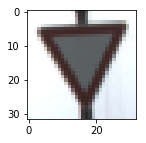

In [18]:
xx = X_train_orig[y_train_orig==13]
plot_image(xx[117])

0_speedlimit_20km_1.jpg
0_speedlimit_20km_2.jpg
12_priority_road_1.jpg
13_yield_1.jpg
17_no_entry_1.jpg
1_speed_limit_30_1.jpg
25_road_work_1.jpg
2_speed_limit_50_1.jpg
2_speed_limit_50_2.jpg
31_wild_animals.jpg
36_Gostraightorright_1.jpg
7_speedlimit100.jpg


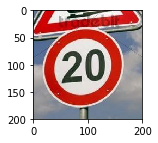

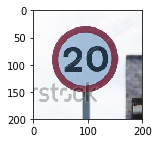

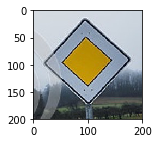

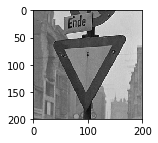

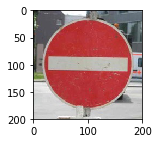

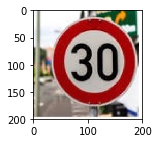

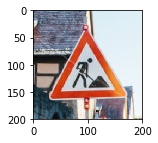

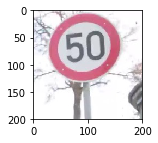

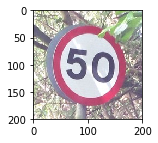

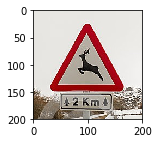

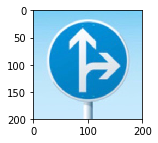

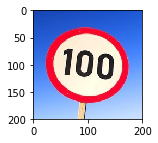

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
import scipy
images = [ (mpimg.imread("test_images/"+i), i) for i in os.listdir("test_images/") if i != ".DS_Store" and not i.startswith("pred")]
for (image, name) in images:
    print(name)
    plot_image(image)

### Predict the Sign Type for Each Image

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
images = [(scipy.misc.imresize(image, (32, 32)), name) for (image, name) in images ]
test_images = [(scale_data(np.asarray(image, dtype="int32")), name ) for (image, name) in images]

In [21]:
test_images[8][0].shape

(32, 32, 3)

In [22]:
softmax_test_images = []
accuracy_list = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for (image, name) in test_images:
        print("image_name = {}".format(name))
        sign_id, softmax = predict([image])
        softmax_test_images.append((softmax, name))
        predicted_class = sign_id.eval()[0]
        expected_class = int(name.split("_")[0])
        accuracy_list.append(int(predicted_class == expected_class))
        print("predicted class id = {}".format(predicted_class ) )
        print()

image_name = 0_speedlimit_20km_1.jpg
predicted class id = 0

image_name = 0_speedlimit_20km_2.jpg
predicted class id = 0

image_name = 12_priority_road_1.jpg
predicted class id = 12

image_name = 13_yield_1.jpg
predicted class id = 13

image_name = 17_no_entry_1.jpg
predicted class id = 17

image_name = 1_speed_limit_30_1.jpg
predicted class id = 1

image_name = 25_road_work_1.jpg
predicted class id = 25

image_name = 2_speed_limit_50_1.jpg
predicted class id = 38

image_name = 2_speed_limit_50_2.jpg
predicted class id = 5

image_name = 31_wild_animals.jpg
predicted class id = 31

image_name = 36_Gostraightorright_1.jpg
predicted class id = 36

image_name = 7_speedlimit100.jpg
predicted class id = 7



### Analyze Performance

In [23]:
### Calculate the accuracy for these 12 new images. 
### For example, if the model predicted 10 out of 12 signs correctly, it's 83% accurate on these new images.
round(sum(accuracy_list)/float(len(accuracy_list))*100, 2)

83.33

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_5 = tf.nn.top_k(tf.constant(np.array([softm for (softm, _) in softmax_test_images])), k=5)
top_5_result = tf.Session().run(top_5)

In [25]:
for (name, (s_top_5, k_top_5)) in zip([sign for (_, sign) in softmax_test_images], zip(top_5_result[0], top_5_result[1]) ):
    print("for image {}".format(name))
    print("Classes:")
    print(k_top_5)
    print("Softmax:")
    print(s_top_5)
    print()
    print("+++++++++++++++++++++++++++++++++++++")
    print()

for image 0_speedlimit_20km_1.jpg
Classes:
[[ 0  1  4 16  8]]
Softmax:
[[  1.00000000e+00   2.17352144e-14   6.44836085e-24   5.24528994e-28
    6.16552948e-29]]

+++++++++++++++++++++++++++++++++++++

for image 0_speedlimit_20km_2.jpg
Classes:
[[ 0 16  3  8  1]]
Softmax:
[[  9.99883890e-01   8.65445254e-05   2.51259662e-05   2.66170196e-06
    1.69212763e-06]]

+++++++++++++++++++++++++++++++++++++

for image 12_priority_road_1.jpg
Classes:
[[12  0  1  2  3]]
Softmax:
[[ 1.  0.  0.  0.  0.]]

+++++++++++++++++++++++++++++++++++++

for image 13_yield_1.jpg
Classes:
[[13 12 38 36  9]]
Softmax:
[[  1.00000000e+00   8.69470560e-33   8.97579261e-36   3.99427334e-36
    1.37125056e-38]]

+++++++++++++++++++++++++++++++++++++

for image 17_no_entry_1.jpg
Classes:
[[17 14  0  1  2]]
Softmax:
[[  1.00000000e+00   1.75293097e-33   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]

+++++++++++++++++++++++++++++++++++++

for image 1_speed_limit_30_1.jpg
Classes:
[[1 2 4 6 5]]
Softmax:
[[  1.00

In [26]:
classes = {
0: "Speed limit (20km/h)",
1: "Speed limit (30km/h)",
2: "Speed limit (50km/h)",
3: "Speed limit (60km/h)",
4: "Speed limit (70km/h)",
5: "Speed limit (80km/h)",
6: "End of speed limit (80km/h)",
7: "Speed limit (100km/h)",
8: "Speed limit (120km/h)",
9: "No passing",
10: "No passing for vehicles over 3.5 metric tons",
11: "Right-of-way at the next intersection",
12: "Priority road",
13: "Yield",
14: "Stop",
15: "No vehicles",
16: "Vehicles over 3.5 metric tons prohibited",
17: "No entry",
18: "General caution",
19: "Dangerous curve to the left",
20: "Dangerous curve to the right",
21: "Double curve",
22: "Bumpy road",
23: "Slippery road",
24: "Road narrows on the right",
25: "Road work",
26: "Traffic signals",
27: "Pedestrians",
28: "Children crossing",
29: "Bicycles crossing",
30: "Beware of ice/snow",
31: "Wild animals crossing",
32: "End of all speed and passing limits",
33: "Turn right ahead",
34: "Turn left ahead",
35: "Ahead only",
36: "Go straight or right",
37: "Go straight or left",
38: "Keep right",
39: "Keep left",
40: "Roundabout mandatory",
41: "End of no passing",
42: "End of no passing by vehicles over 3.5 metric tons"
}

0_speedlimit_20km_1.jpg: ('0-Speed limit (20km/h)-P=1.0', '1-Speed limit (30km/h)-P=0.0', '4-Speed limit (70km/h)-P=0.0', '16-Vehicles over 3.5 metric tons prohibited-P=0.0', '8-Speed limit (120km/h)-P=0.0')


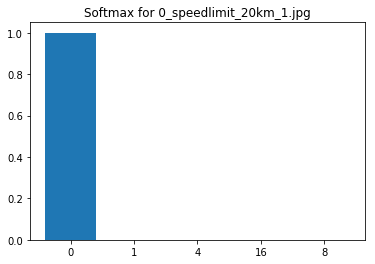

0_speedlimit_20km_2.jpg: ('0-Speed limit (20km/h)-P=1.0', '16-Vehicles over 3.5 metric tons prohibited-P=0.0', '3-Speed limit (60km/h)-P=0.0', '8-Speed limit (120km/h)-P=0.0', '1-Speed limit (30km/h)-P=0.0')


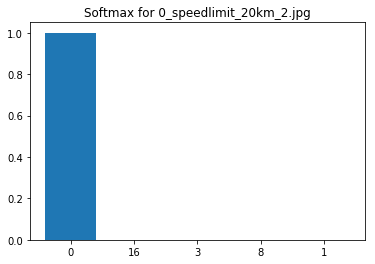

12_priority_road_1.jpg: ('12-Priority road-P=1.0', '0-Speed limit (20km/h)-P=0.0', '1-Speed limit (30km/h)-P=0.0', '2-Speed limit (50km/h)-P=0.0', '3-Speed limit (60km/h)-P=0.0')


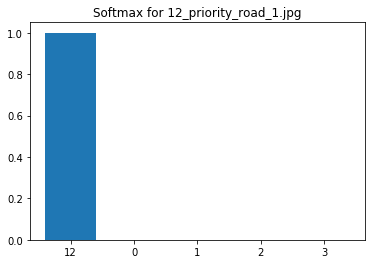

13_yield_1.jpg: ('13-Yield-P=1.0', '12-Priority road-P=0.0', '38-Keep right-P=0.0', '36-Go straight or right-P=0.0', '9-No passing-P=0.0')


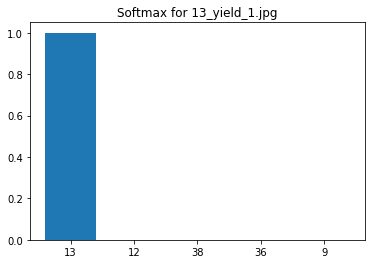

17_no_entry_1.jpg: ('17-No entry-P=1.0', '14-Stop-P=0.0', '0-Speed limit (20km/h)-P=0.0', '1-Speed limit (30km/h)-P=0.0', '2-Speed limit (50km/h)-P=0.0')


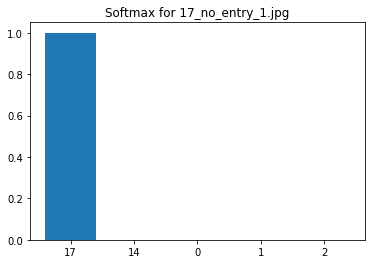

1_speed_limit_30_1.jpg: ('1-Speed limit (30km/h)-P=1.0', '2-Speed limit (50km/h)-P=0.0', '4-Speed limit (70km/h)-P=0.0', '6-End of speed limit (80km/h)-P=0.0', '5-Speed limit (80km/h)-P=0.0')


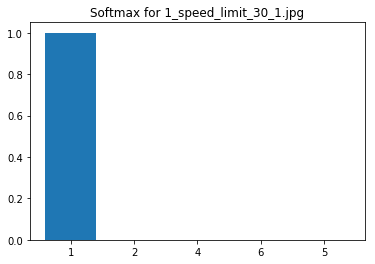

25_road_work_1.jpg: ('25-Road work-P=1.0', '31-Wild animals crossing-P=0.0', '22-Bumpy road-P=0.0', '20-Dangerous curve to the right-P=0.0', '12-Priority road-P=0.0')


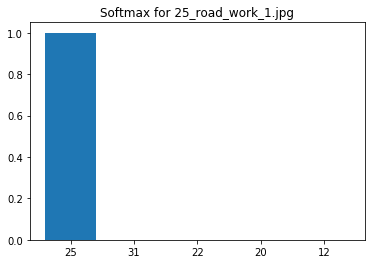

2_speed_limit_50_1.jpg: ('38-Keep right-P=0.6050000190734863', '13-Yield-P=0.3790000081062317', '36-Go straight or right-P=0.009999999776482582', '41-End of no passing-P=0.003000000026077032', '17-No entry-P=0.0010000000474974513')


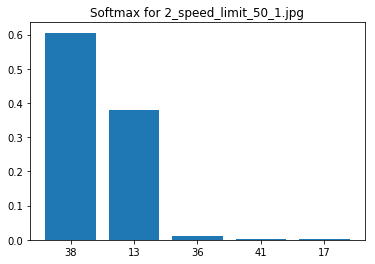

2_speed_limit_50_2.jpg: ('5-Speed limit (80km/h)-P=1.0', '7-Speed limit (100km/h)-P=0.0', '2-Speed limit (50km/h)-P=0.0', '3-Speed limit (60km/h)-P=0.0', '6-End of speed limit (80km/h)-P=0.0')


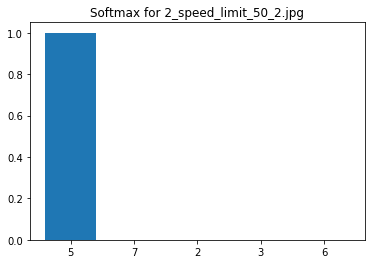

31_wild_animals.jpg: ('31-Wild animals crossing-P=0.8960000276565552', '23-Slippery road-P=0.10199999809265137', '21-Double curve-P=0.0020000000949949026', '29-Bicycles crossing-P=0.0', '19-Dangerous curve to the left-P=0.0')


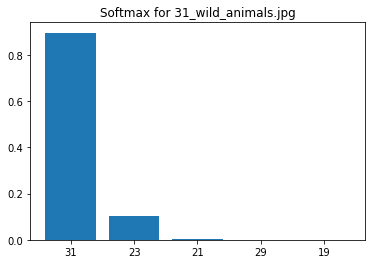

36_Gostraightorright_1.jpg: ('36-Go straight or right-P=1.0', '35-Ahead only-P=0.0', '33-Turn right ahead-P=0.0', '13-Yield-P=0.0', '38-Keep right-P=0.0')


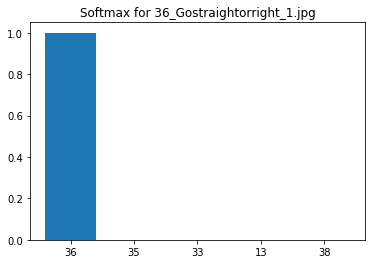

7_speedlimit100.jpg: ('7-Speed limit (100km/h)-P=1.0', '16-Vehicles over 3.5 metric tons prohibited-P=0.0', '8-Speed limit (120km/h)-P=0.0', '5-Speed limit (80km/h)-P=0.0', '3-Speed limit (60km/h)-P=0.0')


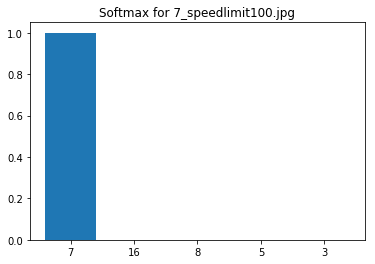

In [27]:
for (name, (s_top_5, k_top_5)) in zip([sign for (_, sign) in softmax_test_images], zip(top_5_result[0], top_5_result[1]) ):
    xplot = scipy.arange(5)
    yplot = s_top_5[0]
    f, ax = plt.subplots()
    ax.set_title('Softmax for {}'.format(name))
    ax.bar(xplot, yplot, align='center')
    ax.set_xticks(xplot)
    ax.set_xticklabels(k_top_5[0])
    labels = tuple (["{}-{}-P={}".format(k, classes[k], round(s_top_5[0][i], 3)) for i, k in enumerate(k_top_5[0])] )
    print("{}: {}".format(name, labels))
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [28]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    sess = tf.get_default_session()
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob1: 1.0, keep_prob2: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

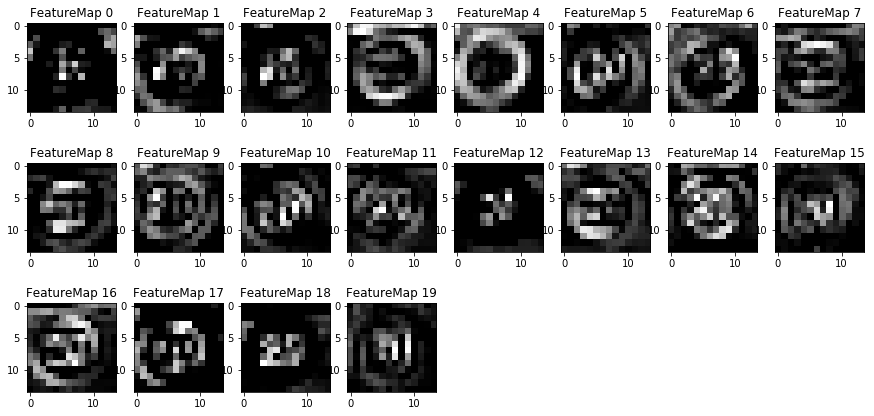

In [29]:
images_ = [im for (im, _) in test_images]
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap([images_[0]], conv1)

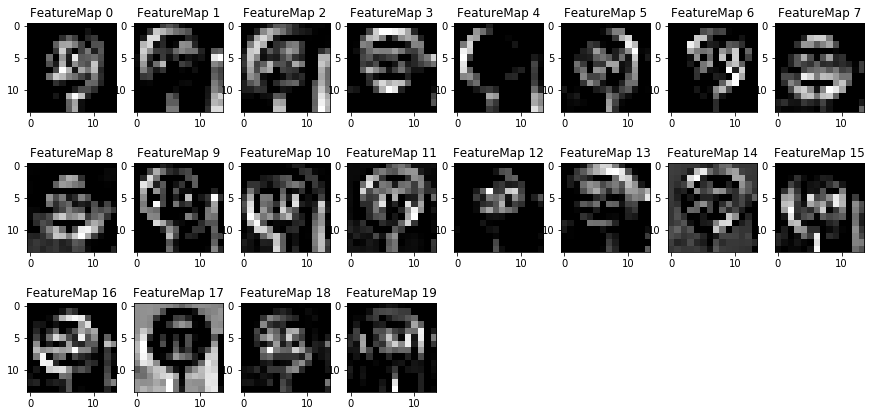

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap([images_[1]], conv1)

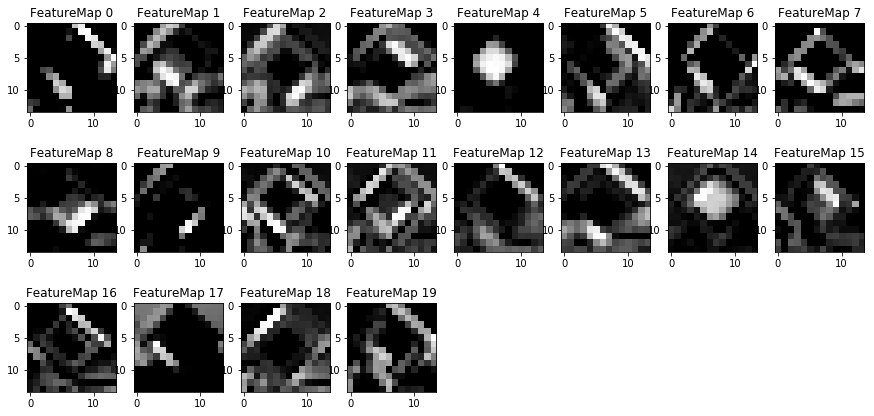

In [31]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap([images_[2]], conv1)

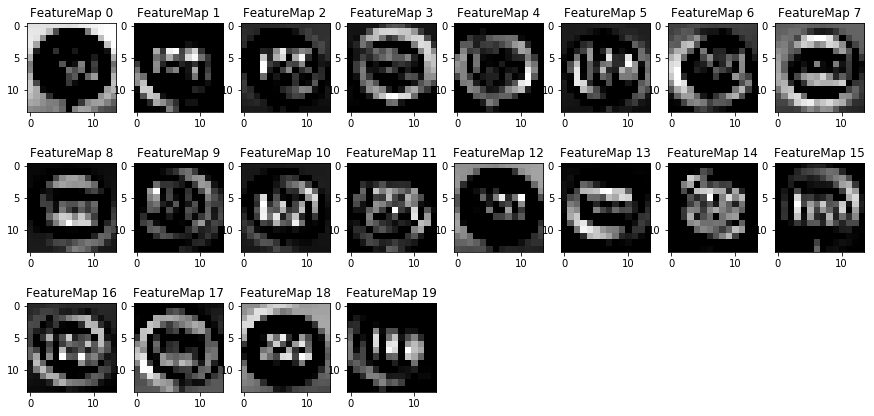

In [32]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap([images_[11]], conv1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

Features maps in conv layer 1 shows different filters, I interpret it as patterns that the networks has learned for every label, then aim on these patters is differentiate each set of filter per class from the rest of the classes.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 